<div style="border:solid green 2px; padding: 20px">
    
<b>Курбан, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования: 
1. Проанализировать рынок недвижимости в Санкт-Петербурге и соседних населённых пунктах.
2. Создать систему борьбы с аномалиями и выбросами в данных.
3. Определить причины ценообразования стоимости квартир.

Ход исследования: 
Прочитаю файл '/datasets/real_estate_data.csv', получю необходимые данные. Данные не обработаны, поэтому проверю их на наличие пропусков, дубликатов, аномалий, подготовлю данные для дальнейшей работы. 
Далее приступлю к исследовательскому анализу.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, старайся, пожалуйста, придерживаться этой стратегии в дальнейших проектах =)
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
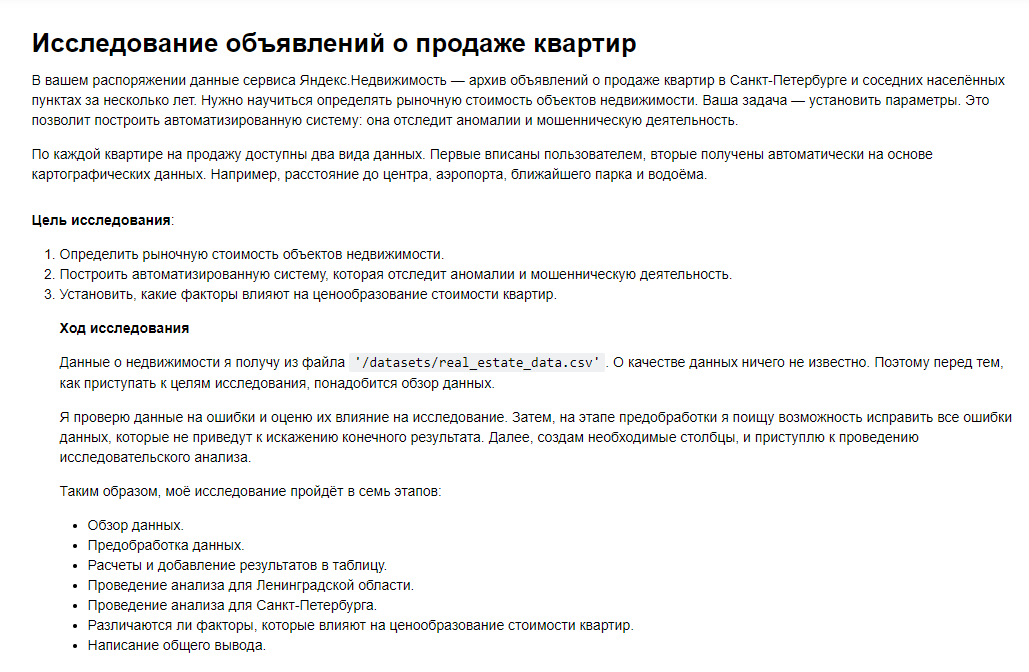
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
# Загружаем данные из файла в датафрейм
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

Посмотрим информацию о датасете, выведем начало и конец.

In [2]:
# Получаем общую информацию
real_estate.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
real_estate.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3818,9,4100000.0,43.0,2017-06-10T00:00:00,2,NaN,5.0,28.0,3,NaN,...,5.5,0.0,Санкт-Петербург,39569.0,11263.0,1.0,258.0,1.0,422.0,117.0


In [4]:
# метод info() поможет изучить структуру таблицы: типы данных, колличество строк, столбцов, пропущенных данных.
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
real_estate.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


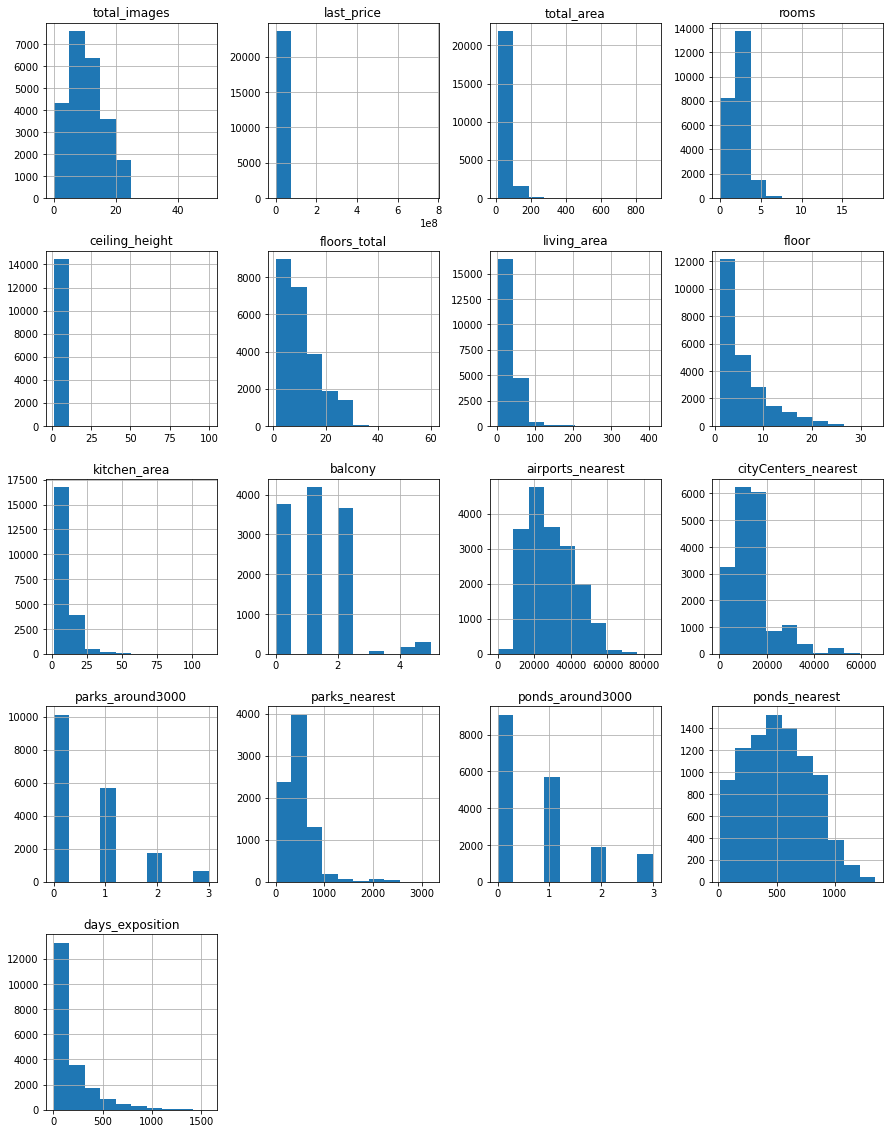

In [7]:
# Построим общую гистограмму для всех числовых столбцов таблицы.
real_estate.hist(figsize = (15,20));

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку `matplotlib.pyplot as plt`
2. В конец кода добавить `;`
    
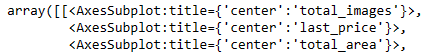
</div>

In [8]:
# Ищем дубликаты
real_estate.duplicated().sum()
# Дубликатов нет

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Проверка на дубликаты - основа предобработки данных
</div>

Вывод: Таблица хранит данные по 23699 объявлениям. Имеется множество пропусков по таблицам: is_apartment, balcony и cityCenters_nearest, ponds_nearest, ponds_around3000 и др. В некоторых столбцах неудобный тип данных.

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

In [9]:
# Ищем пропуски в столбцах
real_estate.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [10]:
# Посмотрим в процентах 
real_estate.isnull().sum().sort_values()/real_estate.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

Необходимо заполнить пропуски в столбцах, начиная с cityCenters_nearest до is_apartment, так как процент пропусков в данных самый высокий. Возможно, в столбце ceiling_height информация моглы быть утеряна в результатее сбоя системы либо составители просто не заполняли.Столбец с балконами почти на 59 % состоит из пропусков, возможно, пропуск значит, что балкона нет. Предполажительно, в стоблце is_apartment, люди не указывали апартаменты, исходя из того что у них не апартаменты. В столбцах с прудами, парками, аэропортами, предположительно, пропуски означают отсутствие данных объектов.В столбце days_exposition, предположительно, объявления все еще размещены.

In [11]:
# Для удобства работы меняем тип данных, избавляемся от пропусков: 
real_estate['total_area'] = real_estate['total_area'].astype('int')
real_estate['last_price'] = real_estate['last_price'].astype('int')
real_estate['is_apartment'] = real_estate['is_apartment'].fillna(False).astype('bool')
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(0).astype('int') 
real_estate['balcony'] = real_estate['balcony'].fillna(0).astype('int')
real_estate['floors_total'] = real_estate['floors_total'].fillna(0).astype('int')

# Переведем формат даты методом to_datetime с помощью параметра format.
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format = '%Y-%m-%d')


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

In [12]:
# Находим аномалии в столбце ceiling_height 
real_estate['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [13]:
# Удаляем аномалии
real_estate = real_estate.query('ceiling_height != [10.3, 14, 100]')
real_estate = real_estate.query('ceiling_height > 2')
real_estate.update(real_estate[(real_estate['ceiling_height'] >= 10) & (real_estate['ceiling_height'] <= 40)]['ceiling_height']/10)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Здорово, что не хардкодишь, а используешь условие
</div>

In [14]:
# Чтобы заполнить пропуски рассчитаем медианное значение и присвоим его пропускам 
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(real_estate['ceiling_height'].median())
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['kitchen_area'].median()).astype(int)
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['living_area'].median()).astype(int)

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Лучше не хардкодить, а использовать функцию или условие: если значение больше 20, то разделить на 10
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: Рекомендую не смотреть данные "на глаз". Лучше посмотреть на выбросы и аномалии данных математически, и удалить их (если они соответствуют здравому смыслу). В этом поможет метод boxplot()
</div>

In [15]:
# Удалим строки с пропусками в колонках floors_total и locality_name.
real_estate.dropna(subset=['floors_total'], inplace = True)
real_estate.dropna(subset=['locality_name'], inplace = True)

# Заменим пропуски на значение 
real_estate['locality_name'].fillna('Неизвестно', inplace=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Ты выбрал самый правильный способ замены пропусков в категоральном столбце - замена на значение-заглушку
</div>

Предположительно, пропуски возникли в результате невнимательности при заполнении.

In [16]:
real_estate['locality_name'] = real_estate['locality_name'].replace('посёлок', 'поселок', regex=True)
real_estate['locality_name'] = real_estate['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово', regex=True)
real_estate['locality_name'].unique()                                                                              

array(['Санкт-Петербург', 'Петергоф', 'поселок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'поселок Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'поселок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'поселок Шушары', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'село Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж', 'поселок Б

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [17]:
real_estate['ceiling_height'].unique()

array([2.7 , 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 8.3 , 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай рассмотрим аномалии в высоте потолков? Наблюдаем значения в 24...27 метров. Вероятнее всего пользователь забыл поставить разделяющий знак. Поправь, этот момент, пожалуйста
</div>

В столбцах пропуски были проанализированы и заменены по возможности, кроме airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, поскольку логичную замену предложить невозможно. Данные в таблице содержали существенное количество пропусков (до 88% в столбце).
Типы данных были преобразованы для проведения удобного анализа, в соответствии с хранимой информацией.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
# Добавим цену за квадратный метр, округлим число до десятой
real_estate['meter_price'] = round(real_estate['last_price'] / real_estate['total_area'], 1)
# Добавим колонки с днем недели, месяцем и годом размещения объявления.
real_estate['weekday'] = real_estate['first_day_exposition'].dt.weekday
real_estate['month'] = real_estate['first_day_exposition'].dt.month
real_estate['year'] = real_estate['first_day_exposition'].dt.year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [19]:
real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.4,3,3,2019
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,...,15008.0,0.0,NaN,0.0,NaN,289,88524.6,6,2,2017
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,...,13878.0,1.0,310.0,2.0,553.0,137,129487.2,3,11,2017
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,...,33058.0,1.0,294.0,3.0,298.0,366,84523.8,5,7,2017
16,11,6700000,82,2017-11-23,3,3.05,5,55,1,False,...,10698.0,3.0,420.0,0.0,NaN,397,81707.3,3,11,2017
18,8,3250000,31,2017-01-27,1,2.50,5,19,2,False,...,10842.0,1.0,759.0,0.0,NaN,168,104838.7,4,1,2017
19,16,14200000,121,2019-01-09,3,2.75,16,76,8,False,...,12843.0,0.0,NaN,0.0,NaN,97,117355.4,2,1,2019
20,12,6120000,80,2017-09-28,3,2.70,27,48,11,False,...,19311.0,0.0,NaN,0.0,NaN,74,76500.0,3,9,2017
22,20,5000000,58,2017-04-24,2,2.75,25,30,15,False,...,NaN,NaN,NaN,NaN,NaN,60,86206.9,0,4,2017


In [20]:
# Определим расстояние до центра города в километрах
real_estate['cityCenters_nearest_km'] = round((real_estate['cityCenters_nearest'] / 1000), 0)

In [21]:
# Для определения этажа квартиры создадим функцию floor_category(). 
def floor_flat (row):
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

real_estate['floor_flat'] = real_estate.apply(floor_flat, axis = 1)

На вход функции поступает строка с данными, внутри сравнивается этаж квартиры с количеством этажей, и на выходе функция именуют категорию. Добавил столбец, в котором указан этаж расположенения квартиры относительно всего здания.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

Ищем выбросы и аномалии в площади.

In [22]:
# общая площадь;
real_estate['total_area'].describe()

count    14473.000000
mean        61.660540
std         37.024307
min         12.000000
25%         41.000000
50%         53.000000
75%         71.000000
max        900.000000
Name: total_area, dtype: float64

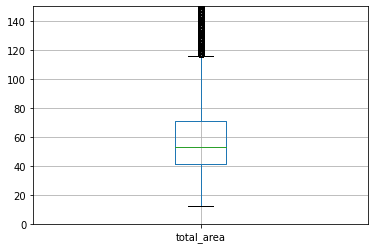

In [23]:
plt.ylim(0, 150)
real_estate.boxplot('total_area')
plt.show()

Большая часть значений лежит в диапазоне от 40 до 70 кв.м.
Первый квартиль находится на уровне 40 кв.м.
Нижняя часть "усов" находится на значении 13, это показатель - минимальное значение. Предположительно, существуют такие комнатки. 
Верхний часть "усов" заканчивается на значении 115 кв.м. 

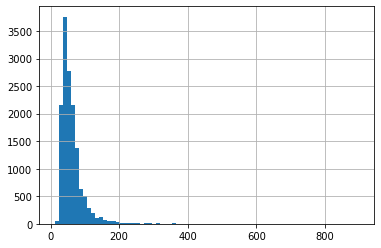

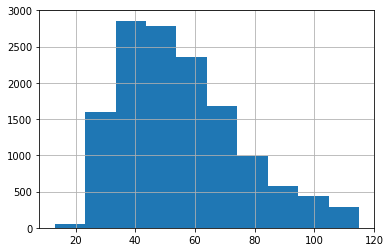

In [24]:
# Первоначальная гистограмма 
real_estate['total_area'].hist(bins=75)
plt.show()
# Срез без выбросов и ошибок
real_estate.query('total_area >= 13 and total_area <= 115')['total_area'].hist()
plt.show()


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал использовать range, чтобы увидеть пиковые значения. 
</div>

In [25]:
# жилая площадь;
real_estate['living_area'].describe()

count    14473.000000
mean        35.128999
std         22.262359
min          2.000000
25%         20.000000
50%         30.000000
75%         42.000000
max        409.000000
Name: living_area, dtype: float64

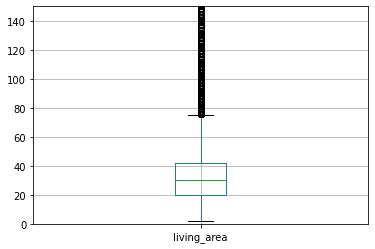

In [26]:
plt.ylim(0, 150)
real_estate.boxplot('living_area')
plt.show()

Большая часть значений лежит в диапазоне от 20 до 40 кв.м.
Первый квартиль находится на уровне 20 кв.м.
Нижняя часть "усов" находится на значении 1 - 2 кв.м., это показатель - минимальное значение. Предположительно, существуют такие маленькие жилые площади (каморки). 
Верхний часть усов заканчивается на значении 70 кв.м.

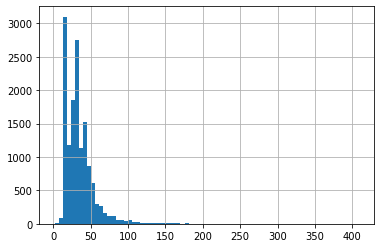

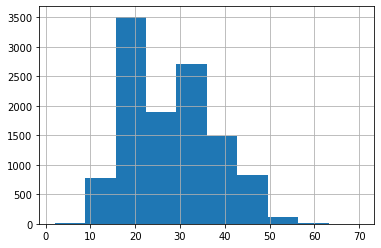

In [27]:
# Первоначальная гистограмма 
real_estate['living_area'].hist(bins=75)
plt.show()
# Срез без выбросов и ошибок
real_estate.query('total_area >= 1 and total_area <= 74')['living_area'].hist()
plt.show()


In [28]:
# площадь кухни;
real_estate['kitchen_area'].describe()

count    14473.000000
mean        10.227596
std          5.880738
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        112.000000
Name: kitchen_area, dtype: float64

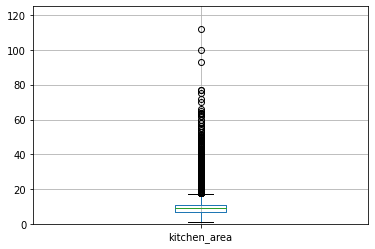

In [29]:
plt.ylim(0, 125)
real_estate.boxplot('kitchen_area')
plt.show()

Большая часть значений лежит в диапазоне от 5 до 10 кв.м.
Первый квартиль находится на уровне 8 кв.м.
Нижняя часть "усов" находится на значении 1 - 2 кв.м., это показатель - минимальное значение. Вероятно, кухни с такой маленькой площадью существуют.  
Верхний часть усов заканчивается на значении 17 кв.м.

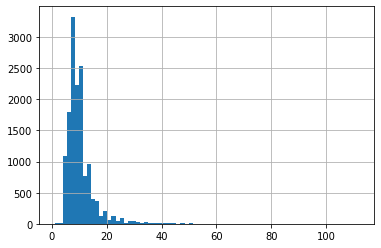

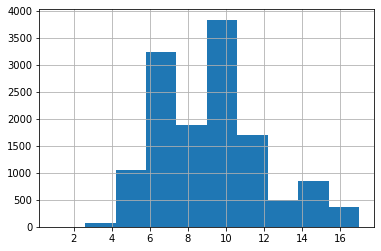

In [30]:
# Первоначальная гистограмма 
real_estate['kitchen_area'].hist(bins=75)
plt.show()
# Срез без выбросов и ошибок
real_estate.query('kitchen_area >= 1 and kitchen_area <= 17')['kitchen_area'].hist()
plt.show()


Исследование цены объекта
По правилам ценообразования цена зависит от населенного пункта, так в большом городе в среднем будет самое дорогое жилье, 
а в деревнях и поселках намного дешевле.


count    1.447300e+04
mean     6.837209e+06
std      1.018991e+07
min      1.219000e+04
25%      3.575000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

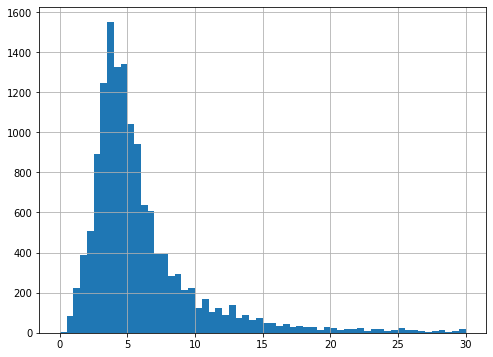

In [31]:
# Цена объекта
# Используем срез без выбросов и ошибок, делим на 1000000 цены, чтобы удобнее было работать с гистограммой 
(real_estate['last_price'] / 1000000).hist(bins=60, range=(0, 30), figsize=(8, 6))
real_estate['last_price'].describe()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub Kernel и Restart & Run All
</div>

Средная стоимость квартир колеблится в районе 4 миллионов.

count    14473.000000
mean         2.137497
std          1.099223
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

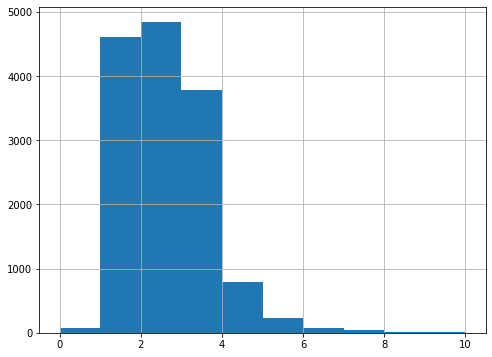

In [32]:
# количество комнат; 
real_estate['rooms'].hist(bins=10, range=(0, 10), figsize=(8, 6))
real_estate['rooms'].describe()

Основная часть продаж приходится на 1 и 2 комнаты.

count    14473.000000
mean         2.728398
std          0.291706
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

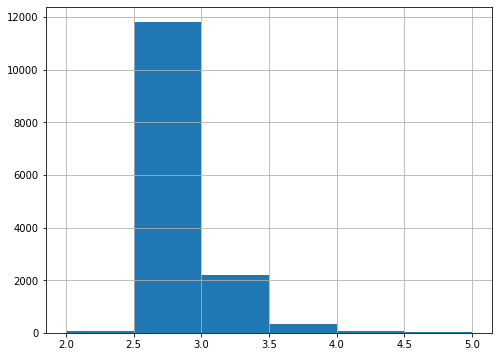

In [33]:
# высота потолков;
real_estate['ceiling_height'].hist(bins=6, range=(2, 5), figsize=(8, 6))
real_estate['ceiling_height'].describe()


У большинства квартир потолки высотой от 2.5 до 3 метров.

count    14473.000000
mean         5.625993
std          4.620062
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

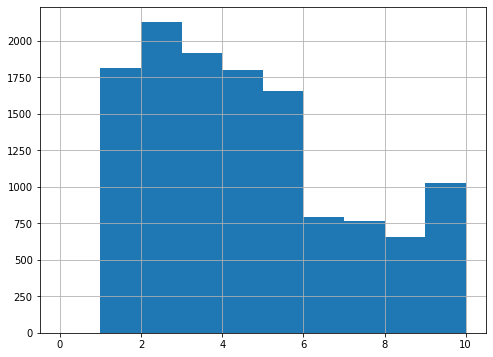

In [34]:
# этаж квартиры;
real_estate['floor'].hist(bins=10, range=(0, 10), figsize=(8, 6))
real_estate['floor'].describe()

Большинство квартир находятся на 2м этаже, меньше всего на 8 этаже.

count      14473
unique         3
top       другой
freq       10573
Name: floor_flat, dtype: object

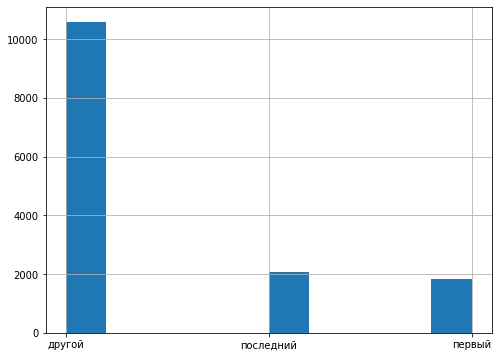

In [35]:
# тип этажа квартиры («первый», «последний», «другой»);
real_estate['floor_flat'].hist(figsize=(8, 6))
real_estate['floor_flat'].describe()

Категория "другой" самая распространенная, под нее поднимает подподает почти 17 500 квартир, "первый" и "последний" имеют, примерно, одинаковое количество квартир: от 2500 до 3000.  

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

count    14473.000000
mean        10.167761
std          6.201165
min          0.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

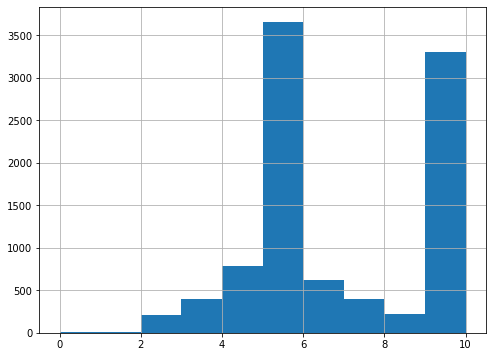

In [36]:
# общее количество этажей в доме;
real_estate['floors_total'].hist(bins=10, range=(0, 10), figsize=(8, 6))
real_estate['floors_total'].describe()

Самая большая категория домов - "пятиэтажки" и "девятиэтажки". 

<AxesSubplot:ylabel='Frequency'>

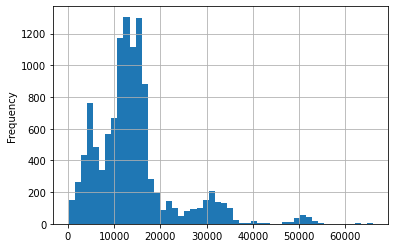

In [37]:
# расстояние до центра города в метрах; в этой гистограмме не используем новую переменную со срезом без выбросов 
real_estate['cityCenters_nearest'].plot(y = 'cityCenters_nearest', kind = 'hist', bins=50, grid = True)

Гистограмма демонстрирует два пика: в районе 5 тысяч метров, и пиковые показатели от 10 до 16 тысяч с колебаниями.

<AxesSubplot:ylabel='Frequency'>

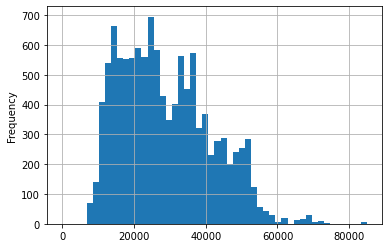

In [38]:
# расстояние до ближайшего аэропорта;
real_estate['airports_nearest'].plot(y = 'airports_nearest', kind = 'hist', bins=50, grid = True)

В среднем квартиры находятся от аэропорта на расстоянии от 10 до 30 тысяч метров, большое количество квартир на расстоянии от 35 до 37 тысячю

<AxesSubplot:ylabel='Frequency'>

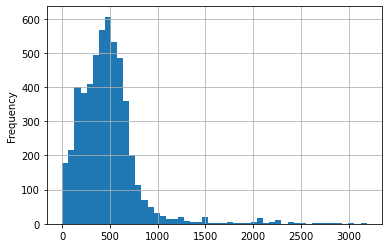

In [39]:
# расстояние до ближайшего парка;
real_estate['parks_nearest'].plot(y = 'parks_nearest', kind = 'hist', bins=50, grid = True)

Большинство квартир находятся на расстоянии 500 метров от парка.

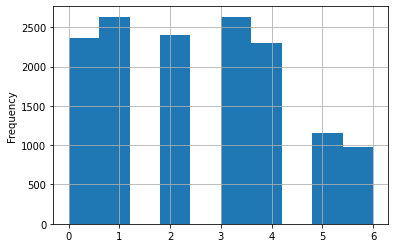

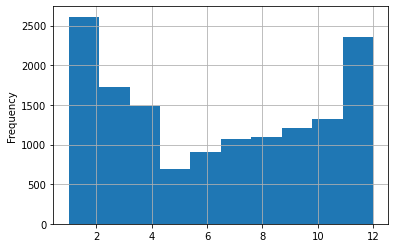

In [40]:
# день и месяц публикации объявления.
real_estate['weekday'].plot(y = 'weekday', kind = 'hist', bins=10, grid = True)
plt.show()

real_estate['month'].plot(y = 'month', kind = 'hist', bins=10, grid = True)
plt.show()

Исходя из статистики: на неделе чаще всего публикуют в понедельник, среду и пятницу, меньше в воскресенье, 
а во вторник и четверг публикации отсутствуют. 
На второй гистрограмме видно, что публикации чаще происходят в начале и в конце месяца.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

<AxesSubplot:ylabel='Frequency'>

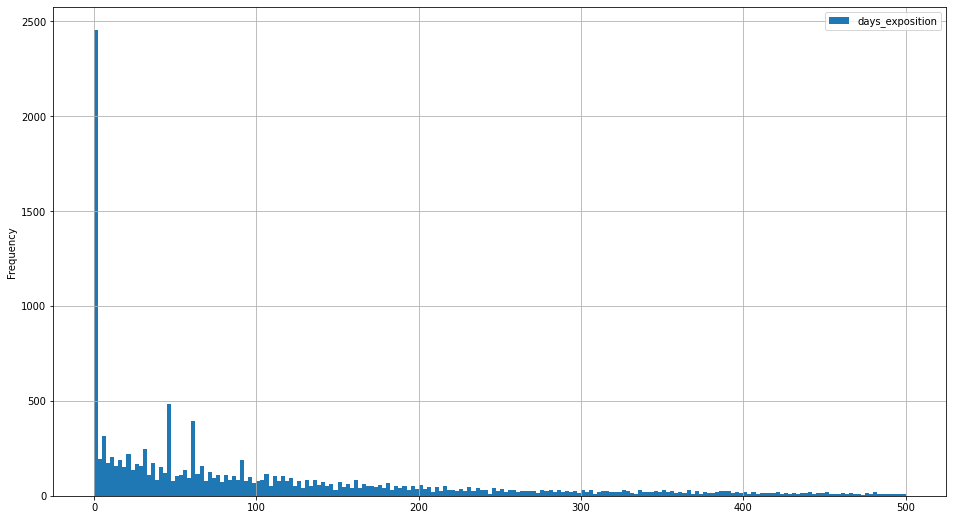

In [41]:
# Скорость продажи квартир 
real_estate.plot(y='days_exposition', kind='hist', bins=200, grid=True, figsize=(16, 9), range = (0, 500))

Согласно гистограмме большая часть квартир продается в течение 200 дней, продажи до 100 дней можно считать необычно быстрыми.
Необычайно долгие продажи занимают от 400 дней.

In [43]:
# Вычисляем среднее и медиану 
real_estate['days_exposition'].describe()

count    14473.000000
mean       158.187729
std        220.399574
min          0.000000
25%         16.000000
50%         72.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продают в течение 158 дней, согласно расчету медианы продажа составляет 72 дня, так как медиана
больше устойчива к выбросам, то ее показатели возьмем за более достоверные данные, следовательно, половина и более квартир продается за 72 дня. Быстрыми можно считать показатели 25%, то есть 16 дней, а долгими 75%, то есть 202 дня.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, чтобы ответить на вопрос "Какие продажи можно считать быстрыми, а какие — необычно долгими?" лучше посмотреть на распределение данных с помощью boxplot() или describe().
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Я бы рекомендавал брать 25% и 75% распределение данных за быстрые и долгие сооветственно
</div>

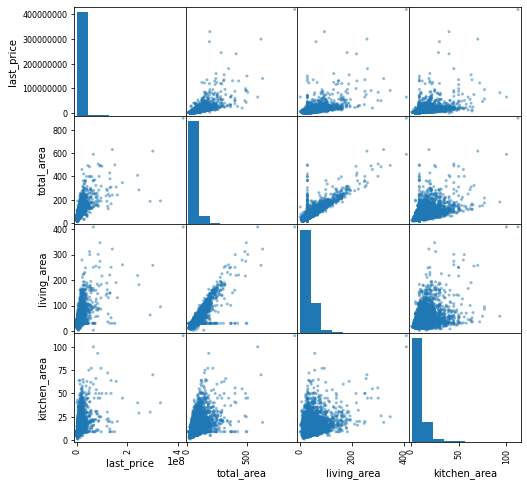

In [44]:
# Зависимость цены от общей площади, жилой площади, площади кухни
pd.plotting.scatter_matrix(real_estate[['last_price', 'total_area', 'living_area', 'kitchen_area']], 
                           figsize=(8, 8));


In [45]:
real_estate['total_area'].corr(real_estate['last_price'])

0.7129243343648692

In [46]:
real_estate['living_area'].corr(real_estate['last_price'])

0.5907229413819084

In [47]:
real_estate['kitchen_area'].corr(real_estate['last_price'])

0.5123058779749321

Исходя из значений  графика: можно сделать вывод, что цена напрямую зависит от площади, 
так как  на графике показатели стоимости растут параллельно растущим показателям площади.Однако корреляция показывает, что зависимость между ценой и общей площадью выше, чем зависимость между ценой и жилой площадью, кухонной площадью.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, зависимость непрерывных данных данных (в нашем случае это площади) рассматриваются через тип графика scatter. Поправишь, пожалуйста, этот момент в разделе?
   
---
    
Так же графики зависимостей лучше подкрепить корреляцией Пирсона и сразу интерпретировать полученные данные
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Отсутствует корреляция Пирсона по площадям. Добавь, пожалуйста
</div>

,median
rooms,
12,420000000
15,65000000
16,28500000
7,26000000
11,25250000
14,25000000
9,24000000
10,23000000
8,21045000


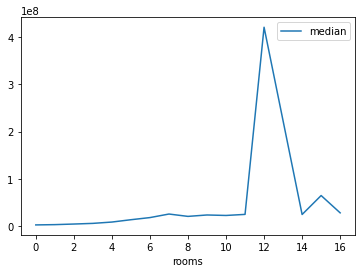

In [48]:
# Зависимость цены от количества комнат
rooms_to_price = real_estate.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
rooms_to_price.columns = ['median']
rooms_to_price.plot(y = 'median')
rooms_to_price.sort_values('median', ascending = False)


In [49]:
real_estate['rooms'].corr(real_estate['last_price'])

0.40146847769034794

График показывает, что количество комнат не влияет на стоимость квартиры. Квартиры с 11-14 комнатами самые дорогие, 15-18 комнатные квартиры практически одинаковы по цене с 1-10 комнатными квартирами. 

,median
floor_flat,
другой,5000000
последний,4500000
первый,4060000


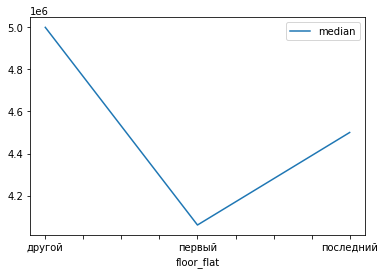

In [50]:
# Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
floor_flat_to_price = real_estate.pivot_table(index = 'floor_flat', values = 'last_price', aggfunc = ['median'])
floor_flat_to_price.columns = ['median']
floor_flat_to_price.plot(y = 'median')
floor_flat_to_price.sort_values('median', ascending = False)

График показывает, что квартиры на первых и последних этажах в стоимости уступают другим. Если квартира не находится на первом и последнем, то цена на нее будет выше.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

,median
weekday,
1,5000000
0,4900000
3,4890000
2,4884000
4,4750000
6,4700000
5,4690000


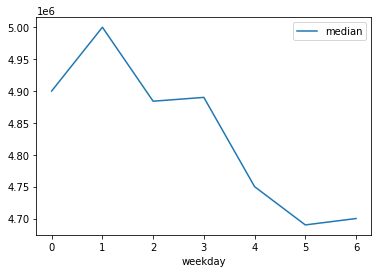

In [51]:
# Зависимоть цены от даты размещения (дня недели).
weekday_to_price = real_estate.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['median'])
weekday_to_price.columns = ['median']
weekday_to_price.plot(y = 'median')
weekday_to_price.sort_values('median', ascending = False)

In [52]:
real_estate['weekday'].corr(real_estate['last_price'])

-0.01571118326199603

График демонстрирует, что цена выше в первые дни недели.

,median
month,
4,5000000
7,4950000
12,4950000
1,4925000
2,4900000
8,4900000
11,4865000
9,4850000
5,4800000


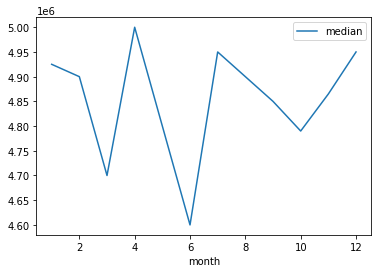

In [53]:
# Зависимоть цены от даты размещения (месяца).
month_to_price = real_estate.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
month_to_price.columns = ['median']
month_to_price.plot(y = 'median')
month_to_price.sort_values('median', ascending = False)

In [54]:
real_estate['month'].corr(real_estate['last_price'])

0.004443182448293576

Пиковые показатели на графике демонстрирую месяцы со 2 по 4, 6 месяц (июнь) является самым низким по показателям. Показатели снова растут после 6 месяца.  

,median
year,
2014,7700000
2015,5600000
2019,5200000
2016,4845000
2017,4700000
2018,4700000


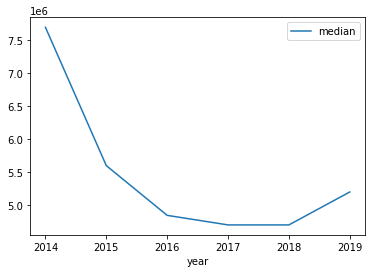

In [55]:
# Зависимоть цены от даты размещения (года).
year_to_price = real_estate.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
year_to_price.columns = ['median']
year_to_price.plot(y = 'median')
year_to_price.sort_values('median', ascending = False)

In [56]:
real_estate['year'].corr(real_estate['last_price'])

-0.0550543464830896

График и сводная таблица демонстрируют, что стоимость выше в самых ранних года - 2014 - 2015, с 2016 по 2018 показатели равнозначные, с 2019 можем наблюдать рост стоимости квартиры.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

In [57]:
# Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
locality_price_per_meter = real_estate.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc=['count', 'median'])
locality_price_per_meter.columns = ['count', 'median']
locality_price_per_meter = locality_price_per_meter.sort_values('count', ascending = False).head(10)
locality_price_per_meter

,count,median
locality_name,,
Санкт-Петербург,10097,106250.0
Всеволожск,271,65833.3
Пушкин,234,100000.0
поселок Шушары,217,77941.2
поселок Мурино,214,86421.2
Колпино,203,75000.0
Гатчина,149,69354.8
Петергоф,145,82258.1
поселок Парголово,137,91538.5


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

Как и было предположено ранее, самые дорогие квартиры (как и за квадратный метр) будут в самом большом городе, то есть в Санкт-Петербурге, там метр квадратный (по медианным показателям) стоит 106 250 руб., самый дешевый во Всеволжске, в котором метр оценивается в 65 833 руб. 

,meter_price
cityCenters_nearest_km,
0.0,193185.755556
1.0,184657.257778
2.0,161849.510959
3.0,119817.823013
4.0,132608.445916
5.0,140336.689673
6.0,149797.315467
7.0,157557.149624
8.0,127523.561153


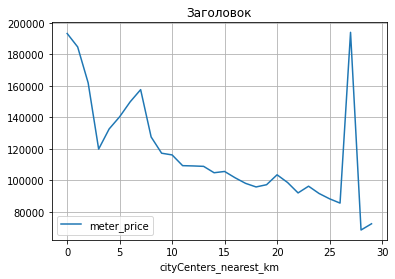

In [58]:
# Средняя цена каждого километра до центра 
cityCenter_km = real_estate.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'meter_price', aggfunc = 'mean')
cityCenter_km.plot(y = 'meter_price', grid = True, title = 'Заголовок')
cityCenter_km.sort_values('cityCenters_nearest_km')


Чем ближе центр, тем дороже квадратный метр. Однако такая тенденция не наблюдается на протяжении всего графика. Так на отрезке от 3 до 8 км наблюдаем подъем цены, а также на отрезке от 25 до 27 км от центра.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок и сетку, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

### Общий вывод

Этапы работы: 
1. обработка первоначальных данных;
2. работа с пропусками и аномалиями в данных;
3. добавление новых столбцов для исследовательского анализа;
4. проведение исследовательского анализа:
а) анализ категорий через гистограммы;
б) выявление зависимости между категориями и стоимостью цен; 
в) определение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;

Основные выводы: 
Больше всего объявлений о продаже 1 - 2комнатных квартир, от 40 до 50 кв. км., стоимостью в районе 4 млн., руб.
Больше всего квартир продают в пятиэтажных и девятиэтажных домах. Парки, как правило, расположены от квартиры на расстоянии до 500 метров, аэропорты - 10 000 метров.

Большая часть квартир продается в течение 200 дней. Объявления о продаже больше появляются в начале недели. 
Характеристики, которые увеличивают стоимость квартиры: 
Общая площадь (в том числе кухонная и жилая);
Расположение не на первом и не на последнем этаже;
Расположение в центре города (верно для Санкт-Петербурга)
Среди первых десяти населенных пунктов по количеству объявлений самая дорогая цена за кв. м в Санкт-Петербурге, а самые дешевые квартиры в Гатчине.


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно.
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Шаг 2.4 (аномалии)

2) Ошибка в коде

3) Какие продажи можно считать быстрыми, а какие — необычно долгими?

4) Построить графики scatter

5) Корреляция Пирсона

6) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №2 </b> 



Отличная работа, осталось поправить 1 момент:

---

Нужно поправить:



1) Корреляция Пирсона по площадям

2) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №3__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод